https://www.kaggle.com/datasets/samaxtech/star-wars-survey-data

<h2>
    Star Wars Survey Data - Data Cleaning
</h2>

<h3>
    Description: 
</h3>
<p>
A team at 538 surveyed ‘Star Wars’ fans on Survey Monkey and collected 800+ responses. Data has several columns related to respondent like — RespondentID (unique ID generated),Gender, Age, Household Income, Education, Location. It has questions like — Have you seen any of the 6 films in the Star Wars franchise? Do you consider yourself to be a fan of the Star Wars film franchise? -Yes/No can be answer. The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question.
</p>


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
df = pd.read_csv('C:/Users/Максим/Desktop/Statistics/star_wars.csv')
pd.set_option('display.max_columns', 40)
df.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [3]:
df.shape

(1187, 38)

<h3>
    Dropping RespondentID column
</h3>

In [4]:
df.drop([0],axis=0, inplace=True)
df.drop(columns=['RespondentID'], inplace=True)
df.head(3)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


<h3>
    Unique values of dataset columns
</h3>

In [5]:
for i in df.iloc[:,0:38]:
    print(df[i].unique())

['Yes' 'No']
['Yes' nan 'No']
['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]
['3' nan '1' '5' '6' '4' '2']
['2' nan '6' '4' '5' '1' '3']
['1' nan '3' '6' '4' '5' '2']
['4' nan '2' '6' '3' '1' '5']
['5' nan '4' '1' '2' '3' '6']
['6' nan '3' '2' '1' '4' '5']
['Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']
['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'Very unfavorably'
 'Unfamiliar (N/A)']
['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'Very unfavorably'
 'Unfamiliar (N/A)']
['Very favorably' nan 'Somewhat fa

<h3>
    Renaming dataset columns 
</h3>

In [6]:
df.rename(columns={'Do you consider yourself to be a fan of the Expanded Universe?æ':'Do you consider yourself to be a fan of the Expanded Universe?',
                  'Which of the following Star Wars films have you seen? Please select all that apply.':'Have you ever seen Episode I The Phantom Menace?',
                  'Unnamed: 4':'Have you ever seen Episode II Attack of the Clones?',
                  'Unnamed: 5':'Have you ever seen Episode III Revenge of the Sith?',
                  'Unnamed: 6':'Have you ever seen Episode IV A New Hope?',
                  'Unnamed: 7':'Have you ever seen Episode V The Empire Strikes Back?',
                  'Unnamed: 8':'Have you ever seen Episode VI Return of the Jedi?',
                  'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Episode I rank',
                  'Unnamed: 10':'Episode II rank',
                  'Unnamed: 11':'Episode III rank',
                  'Unnamed: 12':'Episode IV rank',
                  'Unnamed: 13':'Episode V rank',
                  'Unnamed: 14':'Episode VI rank',
                  'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Rating Han Solo',
                  'Unnamed: 16': 'Rating Luke Skywalker',
                  'Unnamed: 17' : 'Rating Princess Leia Organa',
                  'Unnamed: 18' : 'Rating Anakin Skywalker',
                  'Unnamed: 19' : 'Rating Obi Wan Kenobi',
                  'Unnamed: 20' : 'Rating Emperor Palpatine',
                  'Unnamed: 21' : 'Rating Darth Vader',
                  'Unnamed: 22' : 'Rating Lando Calrissian',
                  'Unnamed: 23' : 'Rating Boba Fett',
                  'Unnamed: 24' : 'Rating C-3P0',
                  'Unnamed: 25' : 'Rating R2 D2',
                  'Unnamed: 26' : 'Rating Jar Jar Binks',
                  'Unnamed: 27' : 'Rating Padme Amidala',
                  'Unnamed: 28' : 'Rating Yoda',},inplace = True)


<h3>
    Replacing Yes/No values with True/False for the next columns
</h3>

In [7]:
l = ['Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?',
    'Are you familiar with the Expanded Universe?',
     'Do you consider yourself to be a fan of the Expanded Universe?',
     'Do you consider yourself to be a fan of the Star Trek franchise?']

for i in l:
    df[i] = df[i].apply(lambda s: True if s == 'Yes' else (False if s=='No' else s))

df.head(3)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you ever seen Episode I The Phantom Menace?,Have you ever seen Episode II Attack of the Clones?,Have you ever seen Episode III Revenge of the Sith?,Have you ever seen Episode IV A New Hope?,Have you ever seen Episode V The Empire Strikes Back?,Have you ever seen Episode VI Return of the Jedi?,Episode I rank,Episode II rank,Episode III rank,Episode IV rank,Episode V rank,Episode VI rank,Rating Han Solo,Rating Luke Skywalker,Rating Princess Leia Organa,Rating Anakin Skywalker,Rating Obi Wan Kenobi,Rating Emperor Palpatine,Rating Darth Vader,Rating Lando Calrissian,Rating Boba Fett,Rating C-3P0,Rating R2 D2,Rating Jar Jar Binks,Rating Padme Amidala,Rating Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


<h3>
    Replacing Episode Name values with True/False for the next columns
</h3>

In [8]:
l1 = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}

for i in df.iloc[:,2:8]:
    df[i] = df[i].map(l1)
    
df.head(3)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you ever seen Episode I The Phantom Menace?,Have you ever seen Episode II Attack of the Clones?,Have you ever seen Episode III Revenge of the Sith?,Have you ever seen Episode IV A New Hope?,Have you ever seen Episode V The Empire Strikes Back?,Have you ever seen Episode VI Return of the Jedi?,Episode I rank,Episode II rank,Episode III rank,Episode IV rank,Episode V rank,Episode VI rank,Rating Han Solo,Rating Luke Skywalker,Rating Princess Leia Organa,Rating Anakin Skywalker,Rating Obi Wan Kenobi,Rating Emperor Palpatine,Rating Darth Vader,Rating Lando Calrissian,Rating Boba Fett,Rating C-3P0,Rating R2 D2,Rating Jar Jar Binks,Rating Padme Amidala,Rating Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


<h3>
    Replacing ranks for actors for the next columns
</h3>

In [9]:
l2 = {"Very favorably": 1,
      "Somewhat favorably": 2,
      "Neither favorably nor unfavorably (neutral)": 3,
      "Somewhat unfavorably": 4,
      "Very unfavorably": 5,
      "Unfamiliar (N/A)": 0,
      np.nan: 0,
      
                 }

for i in df.loc[:,'Rating Han Solo':'Rating Yoda']:
    df[i] = df[i].map(l2)
    
df.head(3)    

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you ever seen Episode I The Phantom Menace?,Have you ever seen Episode II Attack of the Clones?,Have you ever seen Episode III Revenge of the Sith?,Have you ever seen Episode IV A New Hope?,Have you ever seen Episode V The Empire Strikes Back?,Have you ever seen Episode VI Return of the Jedi?,Episode I rank,Episode II rank,Episode III rank,Episode IV rank,Episode V rank,Episode VI rank,Rating Han Solo,Rating Luke Skywalker,Rating Princess Leia Organa,Rating Anakin Skywalker,Rating Obi Wan Kenobi,Rating Emperor Palpatine,Rating Darth Vader,Rating Lando Calrissian,Rating Boba Fett,Rating C-3P0,Rating R2 D2,Rating Jar Jar Binks,Rating Padme Amidala,Rating Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,True,True,True,True,True,True,True,True,3,2,1,4,5,6,1,1,1,1,1,1,1,0,0,1,1,1,1,1,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,2,2,2,2,2,0,0,0,0,0,0,0,0,0,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Have you seen any of the 6 films in the Star Wars franchise?           1186 non-null   bool  
 1   Do you consider yourself to be a fan of the Star Wars film franchise?  836 non-null    object
 2   Have you ever seen Episode I The Phantom Menace?                       1186 non-null   bool  
 3   Have you ever seen Episode II Attack of the Clones?                    1186 non-null   bool  
 4   Have you ever seen Episode III Revenge of the Sith?                    1186 non-null   bool  
 5   Have you ever seen Episode IV A New Hope?                              1186 non-null   bool  
 6   Have you ever seen Episode V The Empire Strikes Back?                  1186 non-null   bool  
 7

In [11]:
df.isnull().sum()

Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    350
Have you ever seen Episode I The Phantom Menace?                           0
Have you ever seen Episode II Attack of the Clones?                        0
Have you ever seen Episode III Revenge of the Sith?                        0
Have you ever seen Episode IV A New Hope?                                  0
Have you ever seen Episode V The Empire Strikes Back?                      0
Have you ever seen Episode VI Return of the Jedi?                          0
Episode I rank                                                           351
Episode II rank                                                          350
Episode III rank                                                         351
Episode IV rank                                                          350
Episode V rank                                                           350

In [12]:
for i in df.iloc[:,0:38]:
    print(df[i].unique())


[ True False]
[True nan False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
['3' nan '1' '5' '6' '4' '2']
['2' nan '6' '4' '5' '1' '3']
['1' nan '3' '6' '4' '5' '2']
['4' nan '2' '6' '3' '1' '5']
['5' nan '4' '1' '2' '3' '6']
['6' nan '3' '2' '1' '4' '5']
[1 0 2 3 4 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 5 3 4]
[1 0 2 5 3 4]
[1 0 2 4 5 3]
[0 2 3 1 4 5]
[0 4 1 2 3 5]
[1 0 2 3 4 5]
[1 0 2 3 4 5]
[1 0 5 2 4 3]
[1 0 2 3 4 5]
[1 0 2 5 3 4]
["I don't understand this question" nan 'Greedo' 'Han']
[True nan False]
[False nan True]
[False True nan]
['Male' nan 'Female']
['18-29' nan '30-44' '> 60' '45-60']
[nan '$0 - $24,999' '$100,000 - $149,999' '$25,000 - $49,999'
 '$50,000 - $99,999' '$150,000+']
['High school degree' 'Bachelor degree' 'Some college or Associate degree'
 nan 'Graduate degree' 'Less than high school degree']
['South Atlantic' 'West South Central' 'West North Central'
 'Middle Atlantic' 'East North Central' 'Pacific' nan 'Mo

<h3>
    Filling NA values for "Not answered" for the next columns
</h3>

In [13]:
l3 = ['Location (Census Region)', 'Education', 'Household Income', 'Age', 'Gender']

for i in l3:
    df[i] = df[i].fillna('Not answered')


In [14]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].fillna('Not answered')

In [15]:
for i in df.loc[:,'Which character shot first?':'Do you consider yourself to be a fan of the Star Trek franchise?']:
    df[i] = df[i].fillna('Not answered')


In [16]:
df['Which character shot first?'] = df['Which character shot first?'].replace('Han', 'Not answered')

df.head(3)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you ever seen Episode I The Phantom Menace?,Have you ever seen Episode II Attack of the Clones?,Have you ever seen Episode III Revenge of the Sith?,Have you ever seen Episode IV A New Hope?,Have you ever seen Episode V The Empire Strikes Back?,Have you ever seen Episode VI Return of the Jedi?,Episode I rank,Episode II rank,Episode III rank,Episode IV rank,Episode V rank,Episode VI rank,Rating Han Solo,Rating Luke Skywalker,Rating Princess Leia Organa,Rating Anakin Skywalker,Rating Obi Wan Kenobi,Rating Emperor Palpatine,Rating Darth Vader,Rating Lando Calrissian,Rating Boba Fett,Rating C-3P0,Rating R2 D2,Rating Jar Jar Binks,Rating Padme Amidala,Rating Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,True,True,True,True,True,True,True,True,3,2,1,4,5,6,1,1,1,1,1,1,1,0,0,1,1,1,1,1,I don't understand this question,True,False,False,Male,18-29,Not answered,High school degree,South Atlantic
2,False,Not answered,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Not answered,Not answered,Not answered,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,2,2,2,2,2,0,0,0,0,0,0,0,0,0,I don't understand this question,False,Not answered,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [17]:
for i in df.iloc[:,0:38]:
    print(df[i].unique())


[ True False]
[True 'Not answered' False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
['3' nan '1' '5' '6' '4' '2']
['2' nan '6' '4' '5' '1' '3']
['1' nan '3' '6' '4' '5' '2']
['4' nan '2' '6' '3' '1' '5']
['5' nan '4' '1' '2' '3' '6']
['6' nan '3' '2' '1' '4' '5']
[1 0 2 3 4 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 5 3 4]
[1 0 2 5 3 4]
[1 0 2 4 5 3]
[0 2 3 1 4 5]
[0 4 1 2 3 5]
[1 0 2 3 4 5]
[1 0 2 3 4 5]
[1 0 5 2 4 3]
[1 0 2 3 4 5]
[1 0 2 5 3 4]
["I don't understand this question" 'Not answered' 'Greedo']
[True 'Not answered' False]
[False 'Not answered' True]
[False True 'Not answered']
['Male' 'Not answered' 'Female']
['18-29' 'Not answered' '30-44' '> 60' '45-60']
['Not answered' '$0 - $24,999' '$100,000 - $149,999' '$25,000 - $49,999'
 '$50,000 - $99,999' '$150,000+']
['High school degree' 'Bachelor degree' 'Some college or Associate degree'
 'Not answered' 'Graduate degree' 'Less than high school degree']
['South Atlantic' 'West 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Have you seen any of the 6 films in the Star Wars franchise?           1186 non-null   bool  
 1   Do you consider yourself to be a fan of the Star Wars film franchise?  1186 non-null   object
 2   Have you ever seen Episode I The Phantom Menace?                       1186 non-null   bool  
 3   Have you ever seen Episode II Attack of the Clones?                    1186 non-null   bool  
 4   Have you ever seen Episode III Revenge of the Sith?                    1186 non-null   bool  
 5   Have you ever seen Episode IV A New Hope?                              1186 non-null   bool  
 6   Have you ever seen Episode V The Empire Strikes Back?                  1186 non-null   bool  
 7

In [19]:
df.isnull().sum()

Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?      0
Have you ever seen Episode I The Phantom Menace?                           0
Have you ever seen Episode II Attack of the Clones?                        0
Have you ever seen Episode III Revenge of the Sith?                        0
Have you ever seen Episode IV A New Hope?                                  0
Have you ever seen Episode V The Empire Strikes Back?                      0
Have you ever seen Episode VI Return of the Jedi?                          0
Episode I rank                                                           351
Episode II rank                                                          350
Episode III rank                                                         351
Episode IV rank                                                          350
Episode V rank                                                           350

<h3>
    Filling NA values for "0" for the Episode rank columns
</h3>

In [20]:
for i in df.loc[:,"Episode I rank":"Episode VI rank"]:
    df[i] = df[i].fillna(0)

<h3>
    Changing data types for the next columns
</h3>

In [21]:
for i in df.loc[:,'Episode I rank':'Rating Yoda']:
    df[i] = df[i].astype('int')

In [22]:
for i in df.loc[:,'Gender':'Location (Census Region)']:
    df[i] = df[i].astype('category')

In [23]:
df.head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you ever seen Episode I The Phantom Menace?,Have you ever seen Episode II Attack of the Clones?,Have you ever seen Episode III Revenge of the Sith?,Have you ever seen Episode IV A New Hope?,Have you ever seen Episode V The Empire Strikes Back?,Have you ever seen Episode VI Return of the Jedi?,Episode I rank,Episode II rank,Episode III rank,Episode IV rank,Episode V rank,Episode VI rank,Rating Han Solo,Rating Luke Skywalker,Rating Princess Leia Organa,Rating Anakin Skywalker,Rating Obi Wan Kenobi,Rating Emperor Palpatine,Rating Darth Vader,Rating Lando Calrissian,Rating Boba Fett,Rating C-3P0,Rating R2 D2,Rating Jar Jar Binks,Rating Padme Amidala,Rating Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,True,True,True,True,True,True,True,True,3,2,1,4,5,6,1,1,1,1,1,1,1,0,0,1,1,1,1,1,I don't understand this question,True,False,False,Male,18-29,Not answered,High school degree,South Atlantic
2,False,Not answered,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Not answered,Not answered,Not answered,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,2,2,2,2,2,0,0,0,0,0,0,0,0,0,I don't understand this question,False,Not answered,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,True,True,True,True,True,5,6,1,2,4,3,1,1,1,1,1,2,1,2,4,1,1,1,1,1,I don't understand this question,False,Not answered,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,True,True,True,True,True,True,True,True,5,4,6,2,1,3,1,2,2,4,1,5,2,3,1,2,2,5,2,2,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [24]:
df.isnull().sum()

Have you seen any of the 6 films in the Star Wars franchise?             0
Do you consider yourself to be a fan of the Star Wars film franchise?    0
Have you ever seen Episode I The Phantom Menace?                         0
Have you ever seen Episode II Attack of the Clones?                      0
Have you ever seen Episode III Revenge of the Sith?                      0
Have you ever seen Episode IV A New Hope?                                0
Have you ever seen Episode V The Empire Strikes Back?                    0
Have you ever seen Episode VI Return of the Jedi?                        0
Episode I rank                                                           0
Episode II rank                                                          0
Episode III rank                                                         0
Episode IV rank                                                          0
Episode V rank                                                           0
Episode VI rank          

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Have you seen any of the 6 films in the Star Wars franchise?           1186 non-null   bool    
 1   Do you consider yourself to be a fan of the Star Wars film franchise?  1186 non-null   object  
 2   Have you ever seen Episode I The Phantom Menace?                       1186 non-null   bool    
 3   Have you ever seen Episode II Attack of the Clones?                    1186 non-null   bool    
 4   Have you ever seen Episode III Revenge of the Sith?                    1186 non-null   bool    
 5   Have you ever seen Episode IV A New Hope?                              1186 non-null   bool    
 6   Have you ever seen Episode V The Empire Strikes Back?                  1186 non-

In [26]:
for i in df.iloc[:,0:38]:
    print(df[i].unique())


[ True False]
[True 'Not answered' False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[3 0 1 5 6 4 2]
[2 0 6 4 5 1 3]
[1 0 3 6 4 5 2]
[4 0 2 6 3 1 5]
[5 0 4 1 2 3 6]
[6 0 3 2 1 4 5]
[1 0 2 3 4 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 4 3 5]
[1 0 2 5 3 4]
[1 0 2 5 3 4]
[1 0 2 4 5 3]
[0 2 3 1 4 5]
[0 4 1 2 3 5]
[1 0 2 3 4 5]
[1 0 2 3 4 5]
[1 0 5 2 4 3]
[1 0 2 3 4 5]
[1 0 2 5 3 4]
["I don't understand this question" 'Not answered' 'Greedo']
[True 'Not answered' False]
[False 'Not answered' True]
[False True 'Not answered']
['Male', 'Not answered', 'Female']
Categories (3, object): ['Female', 'Male', 'Not answered']
['18-29', 'Not answered', '30-44', '> 60', '45-60']
Categories (5, object): ['18-29', '30-44', '45-60', '> 60', 'Not answered']
['Not answered', '$0 - $24,999', '$100,000 - $149,999', '$25,000 - $49,999', '$50,000 - $99,999', '$150,000+']
Categories (6, object): ['$0 - $24,999', '$100,000 - $149,999', '$150,000+', '$25,000 - $49,999', '$50,0

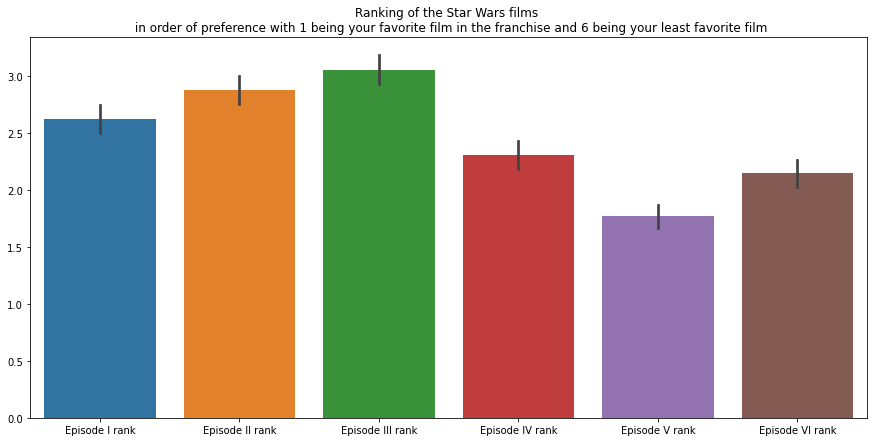

In [27]:
plt.figure(figsize=(15,7))
plt.tight_layout()
x = sns.barplot(data=df.loc[:,'Episode I rank':'Episode VI rank'])
x.set_title('Ranking of the Star Wars films \n in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film')
plt.show()

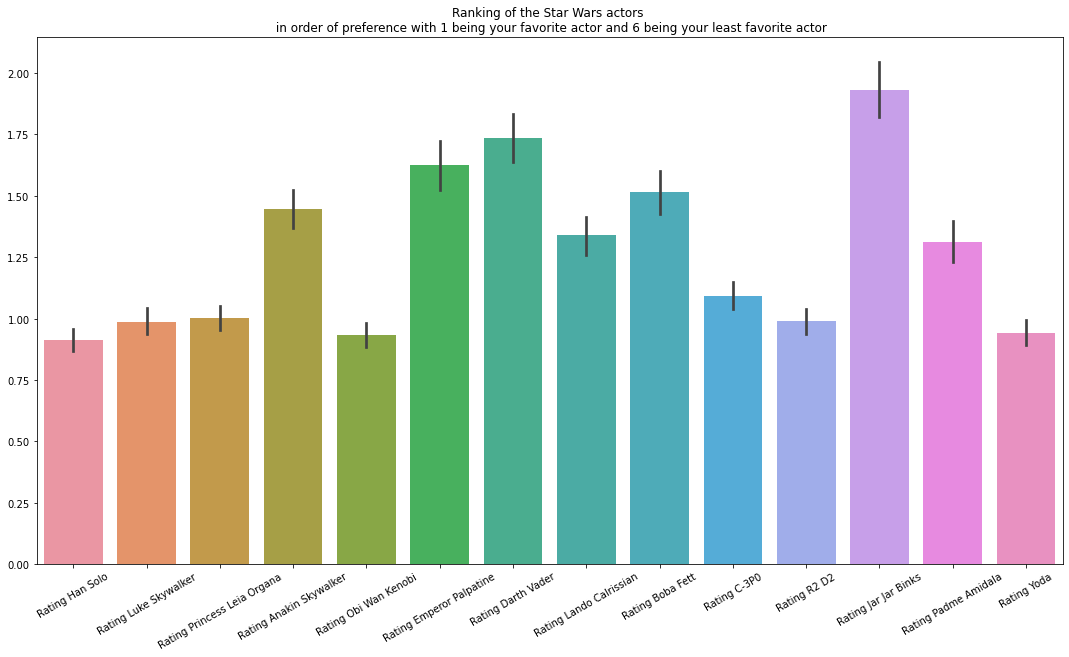

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=30)
plt.tight_layout()
x = sns.barplot(data=df.loc[:,'Rating Han Solo':'Rating Yoda'])
x.set_title('Ranking of the Star Wars actors \n in order of preference with 1 being your favorite actor and 6 being your least favorite actor')
plt.show()

In [29]:
df["How many have seen episodes"] = df.loc[:,"Have you ever seen Episode I The Phantom Menace?":"Have you ever seen Episode VI Return of the Jedi?"].sum(axis=1)

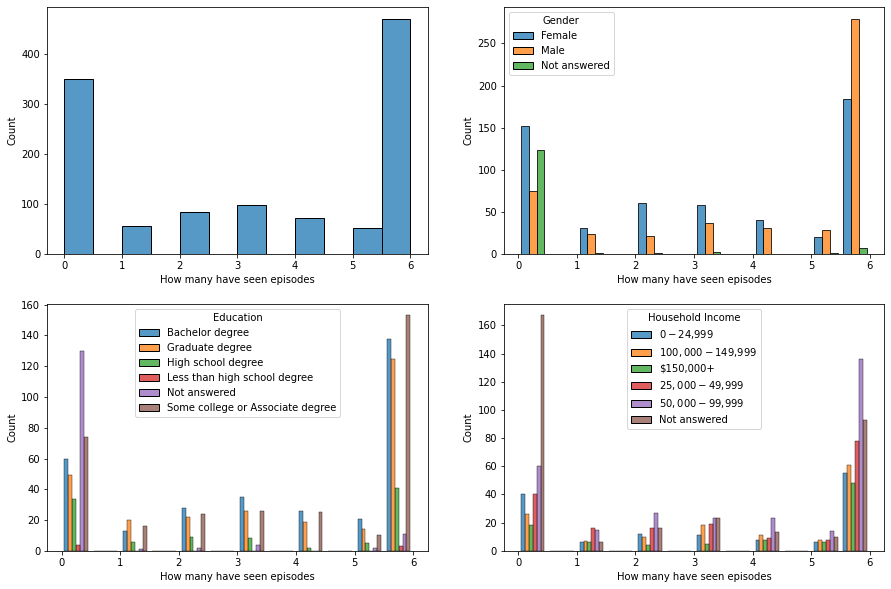

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
x1 = sns.histplot(data=df, x=df['How many have seen episodes'], ax=axes[0,0])
x2 = sns.histplot(data=df, x=df['How many have seen episodes'], hue="Gender", multiple="dodge", shrink=.8, ax=axes[0,1])
x3 = sns.histplot(data=df, x=df['How many have seen episodes'], hue="Education", multiple="dodge", shrink=.8, ax=axes[1,0])
x4 = sns.histplot(data=df, x=df['How many have seen episodes'], hue="Household Income", multiple="dodge", shrink=.8, ax=axes[1,1])

plt.show()